In [1]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scipy
from PIL import Image
from numpy import r_
import scipy.fftpack

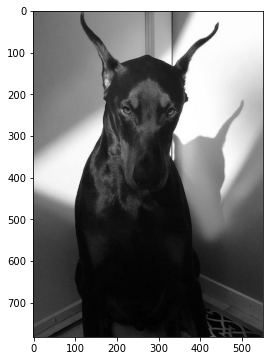

In [2]:
# Transform image to grayscale
img = Image.open('example2.jpg') 
img_gray = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(img_gray) 
plt.show()

In [3]:
#Define 2D DCT and IDCT
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [4]:
# Transform image to numpy matrix
img_matrix = np.array(list(img_gray.getdata(band=0)), float) 
img_matrix.shape = (img_gray.size[1], img_gray.size[0]) 
img_matrix = np.matrix(img_matrix)

In [5]:
imsize = img_matrix.shape
img_dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        img_dct[i:(i+8),j:(j+8)] = dct2( img_matrix[i:(i+8),j:(j+8)] )

Text(0.5, 1.0, 'An 8x8 DCT block')

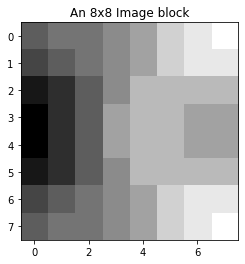

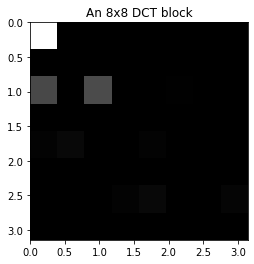

In [7]:
pos = 128

# Extract a block from image
plt.figure()
plt.imshow(img_matrix[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block")

# Display the dct of that block
plt.figure()
plt.imshow(img_dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(img_dct)*0.01,vmin = 0, extent=[0,np.pi,np.pi,0])
plt.title( "An 8x8 DCT block")

Text(0.5, 1.0, '8x8 DCTs of the image')

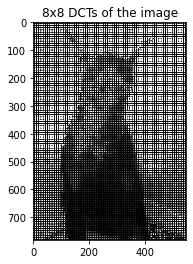

In [9]:
# Display entire DCT
plt.figure()
plt.imshow(img_dct,cmap='gray',vmax = np.max(img_dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

Keeping only 3.254359% of the DCT coefficients


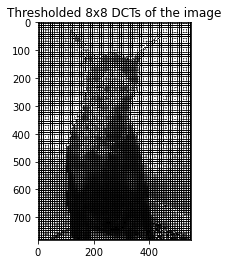

In [11]:
# Threshold
thresh = 0.012
dct_thresh = img_dct * (abs(img_dct) > (thresh*np.max(img_dct)))


plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(img_dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

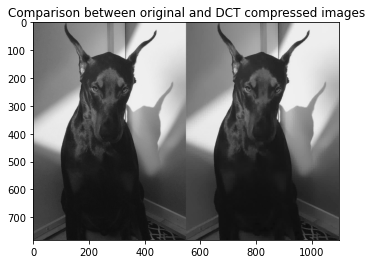

In [12]:
img_idct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        img_idct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (img_matrix, img_idct) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images" )